### College of Computing and Informatics, Drexel University
---

# Data Preprocessing

## Project Title: U.S. Domestic Flights Delay Prediction

## Author(s): Grace Pham, Jessica Jha, Heidi Tran, Khanh Tran

---

## 1. Introduction & Problem Definition
---

Millions of passengers fly everyday (except when a pandemic is taking place) and because flying is one of the fastest ways to travel, demand may get overwhelming, causing delays in departures and landings. Flight delays cause more than just inconvenience - it costs airlines and passegner money from rebooking flights, missing connecting flights, having to provide hotel and purchase food if the next flight is hours or days away. We hope to uncover certain trends from this data such as which airlines have the most delays, which destinations are most impacted, what are the causes of these delays, on average when are these delays happening the most, and build predictive classification models and compare which one can predict flight delays the best.

Using this data found from the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) helps give insight into different factors at play when flights are delayed. This project utilized Apache Spark for downsizing the data and multiple Python libraries for pre-processing, EDA, visualizations, and predictive modeling. The results will benefit passengers to help plan their next itineraries and prepare the best plan of action to make sure their flights to their destination are as delay-free as possible.

## 3. Data
---
#### Main Dataset

The dataset was retrieved from IBM. The original dataset is 7.2 GB in size. This dataset provides information on roughly 200 million U.S. domestic flights on United States Bureau of Transportation Statistics along with the flights’ information including flight date, place of origin, destination, delay time, flight time, etc.

https://developer.ibm.com/exchanges/data/all/airline/

#### Airport Codes for Airline names
The list of airport codes was found on the Bureau of Transportation Statistics on the U.S. Department of Transportation site which was then copied into a CSV file to use to iterate through the list and replace the codes with Airline names to make better sense of the data. 
https://www.bts.gov/topics/airlines-and-airports/airline-codes

#### Metadata
- Fligts dataset
    - Format: CSV
    - Number of records: 194 million
    - Data Coverage: United States 1987 - 2020
    
- Airlines name dataset
    - Format: CSV 
    - Number of records: 1652 records

#### Downsize the data

In order to downsize the data, a local cluster of sample code from the IBM notebook was run on Apache Spark, an open-source cloud clustering platform. A smaller subset of data was able to be extracted so that all of our group members were able to have access to the same data to split pre-processing tasks. 

#### Glossary


| Field Name | Type | Description |
| --- | --- | --- |
| Year | int64 | year of the flight |
| Month | int64 | month of the flight  |
| DayofMonth | int64 | day of the month  |
| FlightDate | datetime64[ns] | date of the flight |
| Reporting_Airline | object | unique airline carrier code|
| DOT_ID_Reporting_Airline | int64 | Number assigned by US DOT to identify a unique airline |
| IATA_CODE_Reporting_Airline | object | Airline Code assigned by IATA |
| Tail_Number | object | Aircraft tail number |
| Flight_Number_Reporting_Airline | int64 | Flight Number |
| OriginAirportID | int64 | Origin Airport ID |
| OriginAirportSeqID | int64 | Origin Airport Sequence ID |
| OriginCityMarketID | int64 | Origin City Market ID |
| Origin | object | Origin Airport Code|
| OriginCityName | object | Origin City Name |
| OriginState | object | Origin State | 
| OriginStateFips | int64 | Origin State FIPS place code | 
| DestAirportID | int64 | Destination Airport ID |
| DestAirportSeqID | int64 | Destination Airport Sequence ID |
| OriginWac | int64 | Origin Airport World Area Code |
| DestCityMarketID | int64 | Destination City Market ID |
| Dest | object | Destination Airport Code |
| DestCityName | object | Destination City Name | 
| DestState | object | Destination State | 
| DestStateFips | int64 | Destination State FIPS code |
| DestStateName | object | Destination State Name |
| DestWac | int64 | Destination Airport World Area Code |
| CRSDepTime | int64 | Computer Reservation System (scheduled) Departure Time |
| DepTime | float64 | Departure Time (hhmm) |
| DepDelay | float64 | Departure delay (minutes) |
| DepDelayMinutes | float64 | Absolute value of DepDelay |
| DepartureDelayGroups | float64 | Departure delay 15 minute interval group |
| DepTimeBlk | object | Computer Reservation System (scheduled) time block |
| TaxiOut | float64 | Taxi out time (minutes) |
| WheelsOff | float64 | Wheels off time (local time, hhmm) |
| WheelsOn | float64 | Wheels on time (local time hhmm) |
| TaxiIn | float64 | Taxi in time (minutes) |
| CRSArrTime | int64 | Computer Reservation System (scheduled)
Arrival Time |
| ArrTime | float64 | Arrival time (local time, hhmm) |
| ArrDelay | float64 | Arrival delay (minutes) |
| ArrDelayMinutes | float64 | Absolute value of ArrDelay |
| ArrDel15 | float64 | Arrival Delay >15? |
| ArrivalDelayGroups | float64 | Arrival delay 15 minute  interval group |
| ArrTimeBlk | object | Computer Reservation System (scheduled) arrival time block |
| Cancelled | float64 | 1 = canceled |
| Diverted | float64 | 1 = diverted |
| CRSElapsedTime | float64 | Computer Reservation System (scheduled) elapsed time |
| ActualElapsedTime | float64 | Actual elapsed time |
| AirTime | float64 | Flight time (minutes) |
| Distance | float64 | Distance between airports (miles) |
| DistanceGroup | int64 | 250 mile distance interval group |
| CarrierDelay | float64 | Carrier delay (minutes) |
| WeatherDelay | float64 | Weather delay (minutes) |
| NASDelay | float64 | National Air System delay (minutes) |
| SecurityDelay | float64 | Security delay (minutes) |
| LateAircraftDelay | float64 | Late aircraft delay (minutes) |
| DivAirportLandings | int64 | Number of diverted airport landings |                     

### Import packages

In [ ]:
import sys
import json
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB # BernoulliNB is designed for binary features
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import precision_recall_fscore_support

import matplotlib.pyplot as plt
#from google.colab import data_table

# Ignore warnings in Jupyter Notebook
import warnings
warnings.filterwarnings('ignore')

# Config seaborn
sns.set(rc={"figure.figsize":(12, 10)})
sns.set_style('darkgrid')
sns.set_palette('Set2')

#### Common utilities that we can re-use.
Some of thehese functions were given to us by IBM sample notebook. We also wrote some original functions to re-use throughout the notebook as well.

In [ ]:
from re import I
def reduce_mem_usage(df: pd.DataFrame) -> pd.DataFrame:
    """Iterate through all the columns of a dataframe and modify the data type to reduce memory usage.
        I doubt that we would use up what Colab gives us in the free tier, but still it's a helpful util.
    :param df: pandas DataFrame    
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


def import_data(file: str, json=False) -> pd.DataFrame:
    """Create a dataframe and optimize its memory usage
    :param file: filepath.
    """
    if json:
        try:
            df = pd.read_json(file)
            df = reduce_mem_usage(df)
        except ValueError:
            df = pd.read_json(file, lines=True)
            df = reduce_mem_usage(df)
    elif not json:
        df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
        df = reduce_mem_usage(df)
    return df

    
def index_file_checker(df, col_name):
    return df[df[col_name].isnull()].index.tolist()


def check_field(df, col_name):
    """Check null percentage of a column
    """
    ind_miss = index_file_checker(df=df, col_name=col_name)
    
    if ind_miss == []:
        print("No Null values of {x}".format(x = col_name))
        if len(df) == len(df[col_name].unique()):
            print("All records of {x} is populated for the \"M Field\" and are unique".format(x = col_name))
            
    else:
        pctMissing = 100*(len(ind_miss)/len(df))
        print(f"Percentage of missing {col_name} field: {pctMissing:.2f}%")


def check_duplicate_values(df: pd.DataFrame, col_name: str =None):
    '''Check for duplicate values in a given column in a given dataframe. If no column is given, only check for duplicate rows in the dataframe.
    '''
    try:
        if col_name is not None:
            dups = df.duplicated(subset=[col_name], keep='first')
            len_dups = len(dups[dups==True])
            percent_dups = 100*len_dups/len(df)

            if len_dups == 0:
                print(f"\nNo duplicate values in {col_name} field.")
            elif len_dups > 0:
                print(f"\nPercentage of duplicate values in {col_name} field: {percent_dups}")
                print(f"Percentage of unique values in {col_name} field: {100-percent_dups}")
        elif col_name is None:
            dups = df.duplicated(keep='first')
            len_dups = len(dups[dups==True])
            percent_dups = 100*len_dups/len(df)
            
            if len_dups == 0:
                print(f"\nNo duplicate rows in dataframe.")
            elif len_dups > 0:
                print(f"\nPercentage of duplicate rows in dataframe: {percent_dups}")
                print(f"\nPercentage of unique rows in dataframe: {100-percent_dups}")
    except Exception as e:
        print(e)


def calculate_bound_values(df, col_name):
  ''' Calculate lower and upper bound value for given column in the dataframe
  '''
  Q1 = df[col_name].quantile(0.25)
  Q3 = df[col_name].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return (lower_bound, upper_bound)


def check_outliers(df: pd.DataFrame, col_name: str = None):
  '''Print out information about the lower boundary, upper boundary and percentage of outliers
  '''
  lower_bound, upper_bound = calculate_bound_values(df, col_name)
  
  outliers_lower = df[col_name][df[col_name] < lower_bound]
  outliers_upper = df[col_name][df[col_name] > upper_bound]
  outliers_cnt = len(outliers_lower) + len(outliers_upper)
  outliers_pct = (outliers_cnt * 100) / len(df[col_name])
  print(f"Column: {col_name}. Lower boundary: {lower_bound}. Upper boundary: {upper_bound}. Percentage of outliers: {outliers_pct:.2f}%")


def remove_outliers(df, col_name):
  '''Replace outliers at given column with null values
  '''
  lower_bound, upper_bound = calculate_bound_values(df, col_name)
  df[col_name] = df[col_name][(df[col_name] < upper_bound) & (df[col_name] > lower_bound)]
  

def get_numeric_cols(df: pd.DataFrame):
  '''Return the names of all the numeric columns in a Data Frame
  '''
  return list(df.select_dtypes(include=[np.number]).columns.values)


def drop_col(df: pd.DataFrame, col_name: str = None) -> pd.DataFrame:
  '''Drop a column in a Data Frame and return the new Data Frame
  '''
  return df.drop(col_name, axis='columns')


def drop_cols_with_missing_val_threshold(df, threshold): 
  '''Drop columns which has percentage of missing value surpassed the input threshold
  Return a new dataframe in which unqualified columns has been dropped
  '''
  threshold_percentage = len(df) * threshold
  return df.dropna(thresh=threshold_percentage, axis=1)


def display_bar_char(xName: str, yName: str, df: pd.DataFrame, orient: str, figSize: (int, int), title: str):
    fig = plt.figure(figsize=figSize)
    ax = plt.axes()
    sns.barplot(x = xName, y = yName, data = df, orient = orient, ax = ax).set(title = title)


def plot_confusion_matrix(data, labels):
    sns.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))
    plt.title("Confusion Matrix")
    sns.set(font_scale=1.4)
    ax = sns.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'})
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set(ylabel="True Label", xlabel="Predicted Label")
    plt.show()

## 4. Data Preprocessing
---

### 4.1 Take a look at the dataset
#### Loading in the data 

In [ ]:
airline_df = import_data("airlines_updated.csv")
airportMapping = import_data("AirlineCodeMapping.csv")

#### Dimension

In [ ]:
print(f"Number of rows: {airline_df.shape[0]}")
print(f"Number of columns: {airline_df.shape[1]}")

Number of rows: 386425
Number of columns: 109


#### First 5 rows

In [ ]:
airline_df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,2019,2,6,11,2,2019-06-11,9E,20363,9E,N927XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,1,2,8,4,2018-02-08,WN,19393,WN,N8688J,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,2,4,3,4,2014-04-03,WN,19393,WN,N374SW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,3,9,5,6,2015-09-05,AS,19930,AS,N589AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,3,7,26,3,2017-07-26,WN,19393,WN,N252WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Columns names

In [ ]:
list(airline_df.columns)

['Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'FlightDate',
 'Reporting_Airline',
 'DOT_ID_Reporting_Airline',
 'IATA_CODE_Reporting_Airline',
 'Tail_Number',
 'Flight_Number_Reporting_Airline',
 'OriginAirportID',
 'OriginAirportSeqID',
 'OriginCityMarketID',
 'Origin',
 'OriginCityName',
 'OriginState',
 'OriginStateFips',
 'OriginStateName',
 'OriginWac',
 'DestAirportID',
 'DestAirportSeqID',
 'DestCityMarketID',
 'Dest',
 'DestCityName',
 'DestState',
 'DestStateFips',
 'DestStateName',
 'DestWac',
 'CRSDepTime',
 'DepTime',
 'DepDelay',
 'DepDelayMinutes',
 'DepDel15',
 'DepartureDelayGroups',
 'DepTimeBlk',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'CRSArrTime',
 'ArrTime',
 'ArrDelay',
 'ArrDelayMinutes',
 'ArrDel15',
 'ArrivalDelayGroups',
 'ArrTimeBlk',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'AirTime',
 'Flights',
 'Distance',
 'DistanceGroup',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityD

#### Columns data types

In [ ]:
airline_df.dtypes

Year                  int64
Quarter               int64
Month                 int64
DayofMonth            int64
DayOfWeek             int64
                     ...   
Div5WheelsOn        float64
Div5TotalGTime      float64
Div5LongestGTime    float64
Div5WheelsOff       float64
Div5TailNum         float64
Length: 109, dtype: object

&rightarrow; We can see that some columns have wrong data types. For example, `FlightDate` should have type `datetime` instead of `object`. We need to fix these columns' data types later.

### 4.2 Remove cancelled flights
We don't need cancelled flights because that indicates a flight that was delayed "forever" so we need to remove it from our data.

In [ ]:
airline_df = airline_df[airline_df["Cancelled"] == 0]

In [ ]:
# We don't need this column anymore since it contains all 1s
airline_df = drop_col(airline_df, "Cancelled")

### 4.3 Drop uneccessary columns

#### Drop `Flights` column
	
The `Flights` column indicates the number of flights, which is usually only "1" in the dataset, so this column would not be beneficial for our analysis.

In [ ]:
airline_df = drop_col(airline_df, "Flights")

#### Drop `Quarter` and `DayOfWeek` column
We don't plan to use these two columns for analysis. Furthermore, the `FlightDate` column already gives us enough information to recalculate quarter and day of week if necessary.

In [ ]:
airline_df = drop_col(airline_df, "Quarter")
airline_df = drop_col(airline_df, "DayOfWeek")

#### Drop   `OriginStateName` column 
There is already an `OriginState` column which has the state abbreviations which we can use for our analysis. Therefore, dropping this column would help condense our values and have our dataset be less redundant.

In [ ]:
airline_df = airline_df.drop(columns=['OriginStateName'], axis=1)

#### Drop column `DepDel15`
The `DepDel15` column indicates that the delay for departure was greater than 15 minutes as a boolean (1 for delay greater than 15 minutes, 0 for delays less than 15 minutes). We are keeping other columns which have actual minute values (such as `DepDelay` and `DepDelayMinutes` so we do not need another indicator of departure delays.

In [ ]:
airline_df = drop_col(airline_df, "DepDel15")

#### Drop column `ArrDel15`
The `ArrDel15` column indicates that the arrival time delay was greater than 15 minutes as a boolean (1 for delay greater than 15 minutes, 0 for delays less than 15 minutes). We are keeping other columns which have actual minute values (such as `ArrDelay` and `ArrDelayMinutes` so we do not need another indicator of arrival delays.

In [ ]:
airline_df = drop_col(airline_df, "ArrDel15")

#### Drop columns  `DepartureDelayGroups` and `ArrivalDelayGroups`
Both  `DepartureDelayGroups` and `ArrivalDelayGroups`indicate delay 15 minute interval groups - this column is filled with integers from -1 and NaNs and regular postive integers, but it will not be beneficial to our analysis as interval groups are not clear indicators as to how long the plane was delayed.

In [ ]:
airline_df = drop_col(airline_df, "DepartureDelayGroups")
airline_df = drop_col(airline_df, "ArrivalDelayGroups")

#### Drop column `DivAirportLandings`
There a little under 1,000 diverted airport landings in a dataset of 300,000+ records (only .25%), so drawing conclusions off delays based of this type of data would be statisically insignificant and not add value to our analysis and predictions.

In [ ]:
temp = sum(airline_df.DivAirportLandings > 0)
print(f"Number of diverted airport landings: {temp}")
print(f"Percentage of diverted airport landings: {temp * 100 / len(airline_df) :.2f}%")

Number of diverted airport landings: 922
Percentage of diverted airport landings: 0.24%


In [ ]:
airline_df = drop_col(airline_df, "DivAirportLandings")

#### Drop column `DistanceGroup`
`DistanceGroup` is defined as "250 mile distance interval group" - we will not be using pre-set groups in our analysis and predictions so we can drop this column to reduce redundant data. In addition, have the `Distance` column which provides more precise flight distance. 

In [ ]:
airline_df.DistanceGroup

0          1
1          4
2          3
3          3
5          5
          ..
386420     1
386421    10
386422     8
386423     2
386424     4
Name: DistanceGroup, Length: 379965, dtype: int64

In [ ]:
airline_df = drop_col(airline_df, "DistanceGroup")

### 4.4 Fix columns data types
#### `FlightDate` column should have type `datetime` instead of `object`

In [ ]:
airline_df.dtypes['FlightDate']

dtype('O')

In [ ]:
#convert to datetime
airline_df['FlightDate'] = pd.to_datetime(airline_df['FlightDate'], format='%Y-%m-%d')

In [ ]:
# Check the type again
airline_df.dtypes['FlightDate']

dtype('<M8[ns]')

### 4.5 Add new columns

#### Add a new column `IsDepDelay` to denote whether a flight delayed departure

In [ ]:
airline_df['IsDepDelay'] = airline_df["DepDelayMinutes"] > 0

#### Add a new column `IsArrDelay` to denote whether a flight delayed departure

In [ ]:
airline_df['IsArrDelay'] = airline_df["ArrDelayMinutes"] > 0

### 4.6 Check missing values

In [ ]:
for col in airline_df.columns:
    check_field(airline_df, col)

No Null values of Year
No Null values of Month
No Null values of DayofMonth
No Null values of FlightDate
No Null values of Reporting_Airline
No Null values of DOT_ID_Reporting_Airline
No Null values of IATA_CODE_Reporting_Airline
No Null values of Tail_Number
No Null values of Flight_Number_Reporting_Airline
No Null values of OriginAirportID
No Null values of OriginAirportSeqID
No Null values of OriginCityMarketID
No Null values of Origin
No Null values of OriginCityName
No Null values of OriginState
No Null values of OriginStateFips
No Null values of OriginWac
No Null values of DestAirportID
No Null values of DestAirportSeqID
No Null values of DestCityMarketID
No Null values of Dest
No Null values of DestCityName
No Null values of DestState
No Null values of DestStateFips
No Null values of DestStateName
No Null values of DestWac
No Null values of CRSDepTime
No Null values of DepTime
Percentage of missing DepDelay field: 0.02%
Percentage of missing DepDelayMinutes field: 0.02%
No Null 

&rightarrow; Some columns have less than 5% missing values. However, some columns have > 95% of missing values. We will drop columns with more than 95% of missing values.

#### Drop columns with more than 95% of missing values

In [ ]:
print(f"Number of columns in airline_df BEFORE dropping columns with more than 95% missing values: {airline_df.shape[1]}") 

Number of columns in airline_df BEFORE dropping columns with more than 95% missing values: 100


In [ ]:
# Drop columns
airline_df = drop_cols_with_missing_val_threshold(airline_df, 0.95)

In [ ]:
print(f"Number of columns in airline_df AFTER dropping columns with more than 95% missing values: {airline_df.shape[1]}") 

Number of columns in airline_df AFTER dropping columns with more than 95% missing values: 47


#### Fill missing values in `DepDelayMinutes` and `ArrDelayMinutes`
Since `DepDelayMinutes` and `ArrDelayMinutes` will become label columns, they cannot contain missing values. We're going to fill it with 0

In [ ]:
print(f"Number of missing value in DepDelayMinutes: {airline_df['DepDelayMinutes'].isnull().sum()}")
print(f"Number of missing value in ArrDelayMinutes: {airline_df['ArrDelayMinutes'].isnull().sum()}")

Number of missing value in DepDelayMinutes: 60
Number of missing value in ArrDelayMinutes: 948


In [ ]:
# Fill missing values
airline_df = airline_df.fillna({'DepDelayMinutes': 0, 'ArrDelayMinutes': 0})

In [ ]:
# Check
print(f"Number of missing value in DepDelayMinutes: {airline_df['DepDelayMinutes'].isnull().sum()}")
print(f"Number of missing value in ArrDelayMinutes: {airline_df['ArrDelayMinutes'].isnull().sum()}")

Number of missing value in DepDelayMinutes: 0
Number of missing value in ArrDelayMinutes: 0


#### Drop rows with missing values

In [ ]:
oldLen = len(airline_df)
airline_df = airline_df.dropna()
print(f"Dropped {oldLen - len(airline_df)} rows.")

Dropped 1008 rows.


### 4.7 Check duplicated rows

In [ ]:
check_duplicate_values(df=airline_df)


No duplicate rows in dataframe.


### 4.8 Rename columns' name for ease of analysis

In [ ]:
airline_df.columns

Index(['Year', 'Month', 'DayofMonth', 'FlightDate', 'Reporting_Airline',
       'DOT_ID_Reporting_Airline', 'IATA_CODE_Reporting_Airline',
       'Tail_Number', 'Flight_Number_Reporting_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'Origin', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginWac', 'DestAirportID',
       'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'CRSDepTime',
       'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepTimeBlk', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrTimeBlk', 'Diverted', 'CRSElapsedTime',
       'ActualElapsedTime', 'AirTime', 'Distance', 'IsDepDelay', 'IsArrDelay'],
      dtype='object')

In [ ]:
airline_df.rename(columns={"Reporting_Airline":"Airline",
                   "Origin":"OriginAirport",
                  "Dest":"DestAirport",
                  "CRSDepTime":"Scheduled_Departure",
                  "DepTime":"Departure_Time",
                  "DepDelay":"Departure_Delay",
                  "CRSArrTime":"Scheduled_Arrival",
                  "ArrTime":"Arrival_Time",
                  "ArrDelay":"Arrival_Delay",
                  "CRSElapsedTime":"Scheduled_Time",
                  "ActualElapsedTime":"Elapsed_Time",
                  "DOT_ID_Reporting_Airline":"DOT_ID_Airline",
                  "IATA_CODE_Reporting_Airline":"IATA_CODE_Airline",
                  "Flight_Number_Reporting_Airline":"Flight_Number_Airline",
                  "DayofMonth":"Day"} ,inplace=True)

In [ ]:
# Check new columns
airline_df.columns

Index(['Year', 'Month', 'Day', 'FlightDate', 'Airline', 'DOT_ID_Airline',
       'IATA_CODE_Airline', 'Tail_Number', 'Flight_Number_Airline',
       'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID',
       'OriginAirport', 'OriginCityName', 'OriginState', 'OriginStateFips',
       'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID',
       'DestAirport', 'DestCityName', 'DestState', 'DestStateFips',
       'DestStateName', 'DestWac', 'Scheduled_Departure', 'Departure_Time',
       'Departure_Delay', 'DepDelayMinutes', 'DepTimeBlk', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'Scheduled_Arrival', 'Arrival_Time',
       'Arrival_Delay', 'ArrDelayMinutes', 'ArrTimeBlk', 'Diverted',
       'Scheduled_Time', 'Elapsed_Time', 'AirTime', 'Distance', 'IsDepDelay',
       'IsArrDelay'],
      dtype='object')

### 4.9 Check outliers

In [ ]:
# Select only numeric cols that is not date time cols
outliers_cols = ['Scheduled_Departure',
       'Departure_Time', 'Departure_Delay', 'DepDelayMinutes', 
       'TaxiOut', 'WheelsOff',
       'WheelsOn', 'TaxiIn', 'Scheduled_Arrival', 'Arrival_Time', 'Arrival_Delay',
       'ArrDelayMinutes', 'Scheduled_Time', 'Elapsed_Time',
       'AirTime', 'Distance']
for col in outliers_cols:
  check_outliers(airline_df, col)

Column: Scheduled_Departure. Lower boundary: -310.5. Upper boundary: 2957.5. Percentage of outliers: 0.00%
Column: Departure_Time. Lower boundary: -320.5. Upper boundary: 2979.5. Percentage of outliers: 0.00%
Column: Departure_Delay. Lower boundary: -23.0. Upper boundary: 25.0. Percentage of outliers: 13.25%
Column: DepDelayMinutes. Lower boundary: -10.5. Upper boundary: 17.5. Percentage of outliers: 16.84%
Column: TaxiOut. Lower boundary: -1.0. Upper boundary: 31.0. Percentage of outliers: 5.93%
Column: WheelsOff. Lower boundary: -305.5. Upper boundary: 2994.5. Percentage of outliers: 0.00%
Column: WheelsOn. Lower boundary: -247.0. Upper boundary: 3209.0. Percentage of outliers: 0.00%
Column: TaxiIn. Lower boundary: -3.5. Upper boundary: 16.5. Percentage of outliers: 5.39%
Column: Scheduled_Arrival. Lower boundary: -116.0. Upper boundary: 3140.0. Percentage of outliers: 0.00%
Column: Arrival_Time. Lower boundary: -244.5. Upper boundary: 3215.5. Percentage of outliers: 0.00%
Column: Ar

<AxesSubplot:>

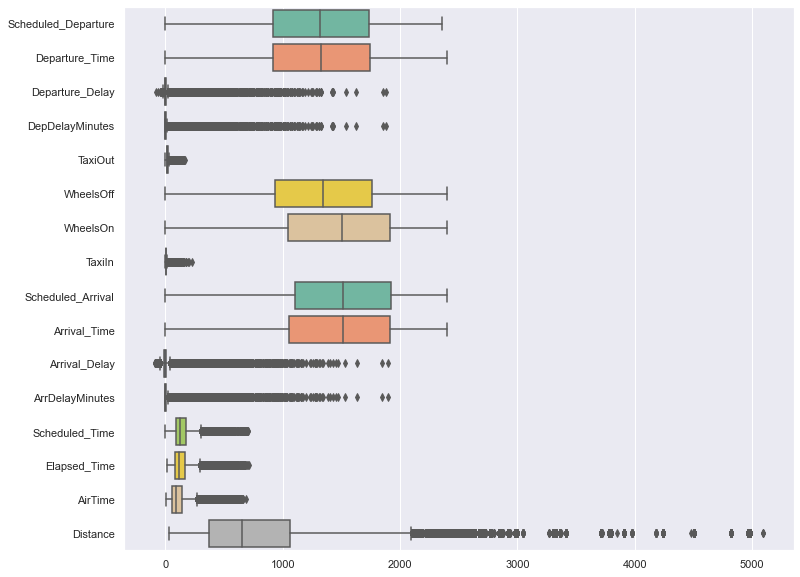

In [ ]:
# Visualize outliers with box plots
sns.boxplot(data=airline_df[outliers_cols], orient="h", palette="Set2")

&rightarrow; `DepDelay`, `DepDelayMinutes`, `ArrDelay`, `ArrDelayMinutes` have about 10% outliers.

### 4.10 Map airline codes to their names 
We want to map airline codes to their names for easy-to-read plots

In [ ]:
airline_df['Airline']

0         9E
1         WN
2         WN
3         AS
5         YX
          ..
386420    AA
386421    UA
386422    DL
386423    B6
386424    DL
Name: Airline, Length: 378957, dtype: object

In [ ]:
airportMapping.head()

,Code,Airline
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [ ]:
airportMapping.rename(columns={"Airline":"Airline_Name"}, inplace=True)
airportMapping.head()

,Code,Airline_Name
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [ ]:
# Map
airline_df = airline_df.merge(airportMapping, left_on='Airline', right_on='Code')

In [ ]:
# Check
airline_df[['Airline', 'Airline_Name']]

,Airline,Airline_Name
0,9E,Endeavor Air Inc.
1,9E,Endeavor Air Inc.
2,9E,Endeavor Air Inc.
3,9E,Endeavor Air Inc.
4,9E,Endeavor Air Inc.
...,...,...
378952,FL,AirTran Airways Corporation
378953,FL,AirTran Airways Corporation
378954,FL,AirTran Airways Corporation
378955,FL,AirTran Airways Corporation


### 4.11 Remove State from `OriginCityName` and `DestCityName`

In [ ]:
# Take a look at the two columns
airline_df[["OriginCityName", "DestCityName"]].head()

,OriginCityName,DestCityName
0,"Atlanta, GA","Columbia, SC"
1,"Atlanta, GA","White Plains, NY"
2,"New York, NY","Charlotte, NC"
3,"Baltimore, MD","Raleigh/Durham, NC"
4,"Pittsburgh, PA","New York, NY"


In [ ]:
# Only keep the city name in the two columns
airline_df["OriginCityName"] = airline_df["OriginCityName"].apply(lambda x: "".join(x.split(',')[0]))
airline_df["DestCityName"] = airline_df["DestCityName"].apply(lambda x: "".join(x.split(',')[0]))

In [ ]:
# Check
airline_df[["OriginCityName", "DestCityName"]].head()